# Amazon Prime EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data into the Data Frame

In [3]:
df = pd.read_csv('amazon_prime_titles.csv')

In [4]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [6]:
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",NaN,NaN,2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w..."


In [10]:
print(df.isnull().sum())
print('\n')
print('Total isnull data :', df.isnull().sum().sum())

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64


Total isnull data : 22161


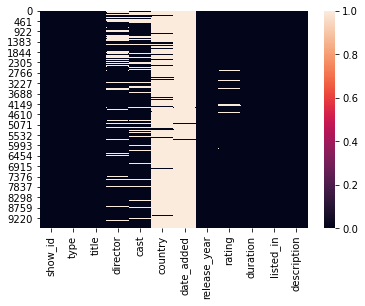

In [14]:
# Checking the missing data across different columns
sns.heatmap(df.isnull());

In [15]:
# nunique : count the number of distinct elements
df.nunique()

show_id         9668
type               2
title           9668
director        5774
cast            7927
country           86
date_added        84
release_year     100
rating            24
duration         219
listed_in        518
description     9414
dtype: int64

Here we can see that, 'type :' value has only 2 values. i.e. Moveis and TV Shows

### Handling the NULL values

In [16]:
df.director.fillna('Data Unavailable', inplace=True)
df.cast.fillna('Data Unavailable', inplace=True)
df.rating.fillna('Data Unavailable', inplace=True)

In [18]:
df.date_added.fillna('Data Unavailable', inplace=True)

In [19]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director           0
cast               0
country         8996
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64


In [20]:
df.country.fillna('Data Unavailable', inplace=True)

In [21]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [22]:
df.isnull().values.any()

False

Thus we've filled the all the NAN values

## TV vs MOVIES

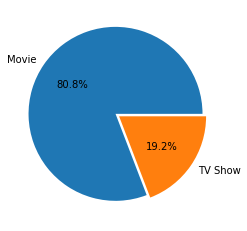

In [26]:
plt.pie(df.type.value_counts(), labels=(df.type.unique()),
        explode=(0.025, 0.025), autopct='%1.1f%%');

## Analysis of TV shoes and Movies

So we start of the analysing the different type of Movies and T.V Shows

In [31]:
# creating seperate Database for Movies and TV Shows
movies_df = df[df['type'] == 'Movie'].copy()
tv_df = df[df['type']=='TV Show'].copy()

In [35]:
movies_df.sample(10)
# sample function give RANDOM

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5031,s5032,Movie,A Dog's Courage,Sung-yoon Lee,"Eric Roland, Patrick McAllister, Bryan Massey,...",Data Unavailable,Data Unavailable,2020,7+,102 min,"Action, Kids","Jacob, a feisty and playful dog abandoned by h..."
8624,s8625,Movie,The Sleeper,Stuart Orme,"Annabelle Apsion, Eileen Atkins, Ciaran Hinds,...",Data Unavailable,Data Unavailable,2000,18+,104 min,"Drama, Horror, Suspense",The presence of a strange old lady at Violet M...
5261,s5262,Movie,Nishabdham,Hemant Madhukar,"Anushka Shetty, Madhavan, Anjali, Michael Madsen",Data Unavailable,Data Unavailable,2020,16+,126 min,Suspense,A murder-mystery thriller. A world-famous cell...
8904,s8905,Movie,Cosmoball,Dzhanik Fayziev,"Viktoriya Agalakova, Wolfgang Cerny",Data Unavailable,Data Unavailable,2021,7+,118 min,"Action, Kids, Science Fiction",Life on earth is desolate after a brutal inter...
5760,s5761,Movie,Unacknowledged: An Expose of the World's Great...,Michael Mazzola,"Steven M. Greer, Giancarlo Esposito, Richard D...",Data Unavailable,Data Unavailable,2017,18+,104 min,Documentary,"Dr. Steven Greer present brand new, stop secre..."
8783,s8784,Movie,Symptoma 20,"Jesús Enrique López Vargas, Athziri Morales, B...","Valeria Alvarez, Joseph Fernandez, Jared Berry...",Data Unavailable,Data Unavailable,2020,16+,50 min,"Arthouse, Horror, Science Fiction","""Symptoma 20"" is a video project that explores..."
6192,s6193,Movie,Wish You Were Here,Kieran Darcy-Smith,"Joel Edgerton, Teresa Palmer, Antony Starr, Fe...",Data Unavailable,Data Unavailable,2013,R,93 min,"Drama, Suspense",Four friends lose themselves in a carefree hol...
1968,s1969,Movie,Kanji Ishiwara: The Man Who Triggered the War,Paul Jenkins,Data Unavailable,Data Unavailable,Data Unavailable,2018,ALL,52 min,"Documentary, Special Interest",Most people think that World War II started on...
1375,s1376,Movie,"Park Avenue: Money, Power & The American Dream",Alex Gibney,"Paul Piff, Anne Rueth, Colin Dunkley, April Du...",Data Unavailable,Data Unavailable,2012,16+,71 min,"Documentary, Special Interest","If income inequality were a sport, the residen..."
9135,s9136,Movie,On Golden Pond,Mark Rydell,"Henry Fonda, Katherine Hepburn, Jane Fonda",Data Unavailable,Data Unavailable,1981,PG,109 min,Drama,"In his final role, Henry Fonda plays Norman Th..."


We can see that 'listed_in' column contains a single strnig for each entry.
So we convert it in such a way that it only, contains one type in 'listed_in'
section.

In [37]:
# genre = movies_df.set_index('show_id').listed_in.str.split(',', expand=True).stack().reset_index(level=1 drop=True)

genre=movies_df.set_index('show_id').listed_in.str.split(',',expand=True).stack().reset_index(level=1,drop=True)

In [56]:
genre.head()

show_id
s1            Comedy
s1             Drama
s2             Drama
s2     International
s3            Action
dtype: object

In [62]:
genre

show_id
s1               Comedy
s1                Drama
s2                Drama
s2        International
s3               Action
              ...      
s9664            Comedy
s9666            Action
s9668            Action
s9668             Drama
s9668          Suspense
Length: 14980, dtype: object

In [63]:
genre_tv = tv_df.set_index('show_id').listed_in.str.split(',',expand=True).stack().reset_index(level=1, drop=True)

In [71]:
len(genre_tv.unique())

54

In [72]:
genre_tv.unique()

array(['Kids', ' Special Interest', 'Comedy', ' Talk Show and Variety',
       'Action', ' Anime', ' Comedy', 'TV Shows', ' Drama', 'Animation',
       ' Fantasy', ' Adventure', ' Animation', 'Anime', ' Kids', 'Drama',
       ' Suspense', 'Fitness', 'Arts', ' Entertainment', ' and Culture',
       ' Western', 'Documentary', ' Science Fiction', 'Adventure',
       ' Romance', ' Unscripted', 'Unscripted', ' Military and War',
       ' Documentary', 'Sports', ' International', 'Suspense',
       'Special Interest', ' Sports', 'Horror', ' LGBTQ', 'Fantasy',
       ' Horror', ' Young Adult Audience', 'International',
       ' Music Videos and Concerts', ' Faith and Spirituality',
       ' Historical', 'Romance', 'Science Fiction',
       'Young Adult Audience', 'Arthouse', ' Arts',
       'Talk Show and Variety', 'LGBTQ', 'Music Videos and Concerts',
       'Western', 'Faith and Spirituality'], dtype=object)

Here we see that the GENRE - 'Drama' and 'Drama' have occured twice.
So we remove one of them..

In [76]:
genre.replace(' Drama','Drama',inplace=True)
genre_tv.replace(' Drama','Drama',inplace=True)
genre_tv.unique()

array(['Kids', ' Special Interest', 'Comedy', ' Talk Show and Variety',
       'Action', ' Anime', ' Comedy', 'TV Shows', 'Drama', 'Animation',
       ' Fantasy', ' Adventure', ' Animation', 'Anime', ' Kids',
       ' Suspense', 'Fitness', 'Arts', ' Entertainment', ' and Culture',
       ' Western', 'Documentary', ' Science Fiction', 'Adventure',
       ' Romance', ' Unscripted', 'Unscripted', ' Military and War',
       ' Documentary', 'Sports', ' International', 'Suspense',
       'Special Interest', ' Sports', 'Horror', ' LGBTQ', 'Fantasy',
       ' Horror', ' Young Adult Audience', 'International',
       ' Music Videos and Concerts', ' Faith and Spirituality',
       ' Historical', 'Romance', 'Science Fiction',
       'Young Adult Audience', 'Arthouse', ' Arts',
       'Talk Show and Variety', 'LGBTQ', 'Music Videos and Concerts',
       'Western', 'Faith and Spirituality'], dtype=object)

In [77]:
len(genre_tv.unique())

53

## Plotting the Data

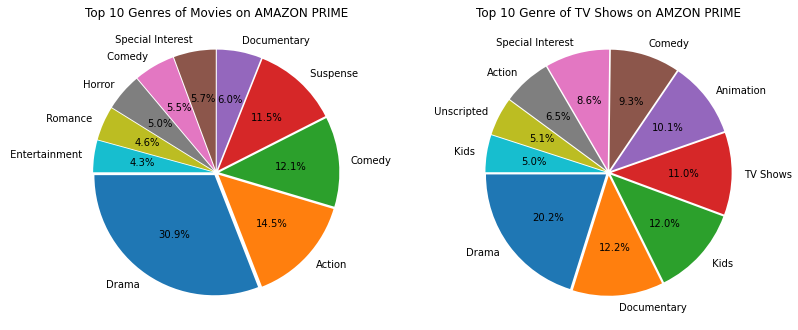

In [88]:
expl = [0.025]*10
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].set_title('Top 10 Genres of Movies on AMAZON PRIME')
ax[0].pie(genre.value_counts().head(10),labels=list(genre.value_counts().head(10).index)
,explode=expl, startangle=180,autopct='%1.1f%%');
ax[1].set_title('Top 10 Genre of TV Shows on AMZON PRIME')
ax[1].pie(genre_tv.value_counts().head(10),labels=list(genre_tv.value_counts().head(10).index)
         ,explode=expl, startangle=180, autopct='%1.1f%%');
plt.tight_layout(pad=4)

<Figure size 432x288 with 0 Axes>

Thus we can see that **DRAMA** is the most watched among both of them

### Directors of Amazon Prime

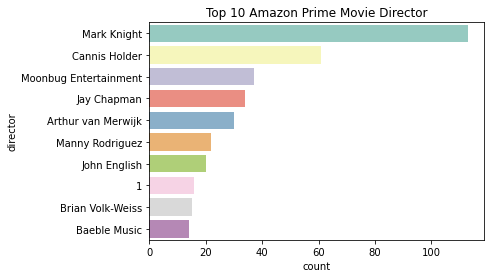

In [93]:
direct_movies = movies_df[movies_df.director!='Data Unavailable'].director
sns.countplot(y=direct_movies, order=direct_movies.value_counts().index[:10], palette='Set3');
plt.title("Top 10 Amazon Prime Movie Director");

## Ratings of the Movies

In [95]:
df[df!= 'Data Unavailable'].rating .unique()

array([nan, '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+',
       'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G',
       'PG', 'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

<AxesSubplot:xlabel='rating', ylabel='count'>

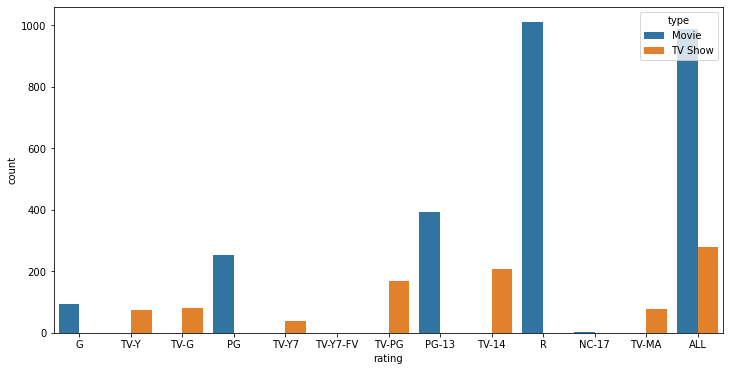

In [96]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7',
          'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA','ALL']
plt.figure(figsize=(12,6))
sns.countplot(x=df.rating, hue=df.type, order=order)

Text(0.5, 1.0, 'Rating of T.V Shows')

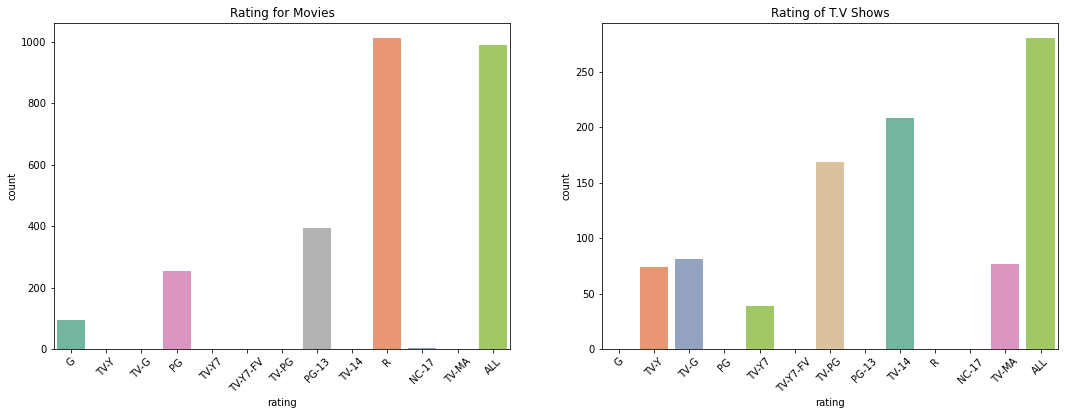

In [99]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
f1 = sns.countplot(x='rating', data=movies_df, ax=ax[0],palette='Set2', order=order)
f1.set_title("Rating for Movies")
f1.set_xticklabels(f1.get_xticklabels(),rotation=45)
f2 = sns.countplot(x='rating', data=tv_df, ax=ax[1], palette='Set2', order=order)
f2.set_xticklabels(f2.get_xticklabels(),rotation=45)
f2.set_title('Rating of T.V Shows')

## Duration of the Content

In [101]:
df.duration.sample(5)

8866       83 min
2317    2 Seasons
7321     1 Season
9658       87 min
7750       72 min
Name: duration, dtype: object

In [102]:
df.duration.unique()

array(['113 min', '110 min', '74 min', '69 min', '45 min', '52 min',
       '98 min', '131 min', '87 min', '92 min', '88 min', '93 min',
       '94 min', '46 min', '96 min', '1 Season', '104 min', '62 min',
       '50 min', '3 Seasons', '2 Seasons', '86 min', '36 min', '37 min',
       '103 min', '9 min', '18 min', '14 min', '20 min', '19 min',
       '22 min', '60 min', '6 min', '54 min', '5 min', '84 min',
       '126 min', '125 min', '109 min', '89 min', '85 min', '56 min',
       '40 min', '111 min', '33 min', '34 min', '95 min', '99 min',
       '78 min', '4 Seasons', '77 min', '55 min', '53 min', '115 min',
       '58 min', '49 min', '135 min', '91 min', '64 min', '59 min',
       '48 min', '122 min', '90 min', '102 min', '65 min', '114 min',
       '136 min', '70 min', '138 min', '100 min', '480 min', '4 min',
       '30 min', '152 min', '68 min', '57 min', '7 Seasons', '31 min',
       '151 min', '149 min', '9 Seasons', '141 min', '121 min', '79 min',
       '140 min', '51 min'

We can see that the Duration of the movie is given in mins, so we change it to relevant integer values

In [119]:
movies_df.duration = movies_df.duration.str.replace('','').astype(int)

AttributeError: Can only use .str accessor with string values!

In [122]:
df['duration'].dtype

dtype('O')

In [109]:
 movies_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,Data Unavailable,113,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,Data Unavailable,74,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,Data Unavailable,69,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,Data Unavailable,45,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9660,s9661,Movie,The Man in the Hat,"John-Paul Davidson, Stephen Warbeck","Ciaran Hinds, Stephen Dillane, Maïwenn",Data Unavailable,Data Unavailable,2021,13+,96,Comedy,The Man in the Hat journeys through France in ...
9662,s9663,Movie,River,Emily Skye,"Mary Cameron Rogers, Alexandra Rose, Rob Marsh...",Data Unavailable,Data Unavailable,2021,16+,93,"Drama, Science Fiction, Suspense","River is a grounded Sci-Fi mystery Thriller, t..."
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",Data Unavailable,Data Unavailable,1940,7+,60,Comedy,New York City street principles get an East Si...
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",Data Unavailable,Data Unavailable,2008,R,90,Action,"In war-torn Eastern Europe, a world-weary grou..."


In [115]:
movies_df.duration

0       113
1       110
2        74
3        69
4        45
       ... 
9660     96
9662     93
9663     60
9665     90
9667    103
Name: duration, Length: 7814, dtype: int32

In [114]:
df.replace({'duration':{'1 Season':'1 Seasons'}},inplace=True)
df.duration=df.duration.str.replace(' Seasons','').astype(int)

ValueError: invalid literal for int() with base 10: '113 min'